### Merge Sort

In [1]:
# This modified code was obtained from https://www.geeksforgeeks.org/python/python-program-for-merge-sort/

def merge(arr, l, m, r):
    n1 = m - l + 1
    n2 = r - m

    # create temp arrays
    L = [0] * (n1)
    R = [0] * (n2)

    # Copy data to temp arrays L[] and R[]
    for i in range(0, n1):
        L[i] = arr[l + i]

    for j in range(0, n2):
        R[j] = arr[m + 1 + j]

    # Merge the temp arrays back into arr[l..r]
    i = 0     # Initial index of first subarray
    j = 0     # Initial index of second subarray
    k = l     # Initial index of merged subarray

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    # Copy the remaining elements of L[], if there
    # are any
    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    # Copy the remaining elements of R[], if there
    # are any
    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

# l is for left index and r is right index of the
# sub-array of arr to be sorted


def mergeSort(arr, l, r):
    if l < r:

        # Same as (l+r)//2, but avoids overflow for
        # large l and h
        m = l+(r-l)//2

        # Sort first and second halves
        mergeSort(arr, l, m)
        mergeSort(arr, m+1, r)
        merge(arr, l, m, r)

### Insertion Sort

In [2]:
# This code was obtained from https://www.geeksforgeeks.org/dsa/insertion-sort-algorithm/

def insertionSort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1

        # Move elements of arr[0..i-1], that are
        # greater than key, to one position ahead
        # of their current position
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

## Runtime Tests

In [3]:
import timeit
import random
random.seed(42)

n_list = [n for n in range(201)]
merge_time = []
insertion_time = []

for n in n_list:
    
    temp1 = 0
    temp2 = 0
    
    for i in range(2000):
        data1 = [random.randint(0, 100000) for _ in range(n)]
        data2 = data1.copy()
        data_length = len(data1)
    
        right = len(data1) - 1
        start_time = timeit.default_timer()
        mergeSort(data1, 0, right)
        end_time = timeit.default_timer()
        temp1 += end_time - start_time
    
        start_time = timeit.default_timer()
        insertionSort(data2)
        end_time = timeit.default_timer()
        temp2 += end_time - start_time
        
    merge_time.append(temp1 / 2000)
    insertion_time.append(temp2 / 2000)

In [4]:
crossover_indices = [i for i in range(len(n_list)) if insertion_time[i] > merge_time[i]]
crossover_indices[:5]

[0, 1, 127, 128, 129]

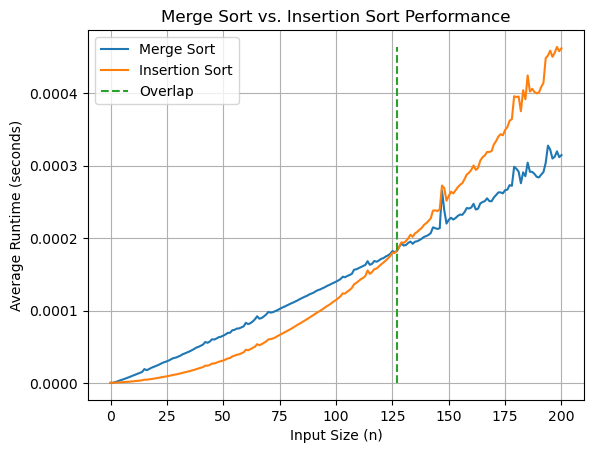

In [5]:
import matplotlib.pyplot as plt

plt.plot(n_list, merge_time, label = "Merge Sort")
plt.plot(n_list, insertion_time, label = "Insertion Sort")
plt.plot([crossover_indices[2], crossover_indices[2]], [0, max([max(merge_time), max(insertion_time)])],
        linestyle = '--', label = "Overlap")
plt.xlabel("Input Size (n)")
plt.ylabel("Average Runtime (seconds)")
plt.title("Merge Sort vs. Insertion Sort Performance")
plt.legend()
plt.grid(True)
plt.show()